# Evaluation of Boundaries

## Data from the GT and TOC-based PageParser

In [1]:
from collections import defaultdict
import json
import os
from nltk.metrics.segmentation import pk, windowdiff

pks = {}
wd = {}
# Calculate the average segment length
def average_segment_length(boundaries):
    return len(boundaries) / boundaries.count(1)


# Step 1: Construct segments_all for gt
for file in os.listdir("./data/gt_segments/"):
    print(file)
    if file.endswith(".json")and file !="segments_access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace.json":
        with open(os.path.join("./data/gt_segments/", file), "r", encoding='utf-8-sig') as f:
            segments_data = json.load(f)

        segments_all_gt = ""

        # Iterate over segments_data to construct the segments_all_gt string
        for s in segments_data:
            if s and "content" in s.keys():
                for text in s["content"]:
                    if text is not None:  # Ensure text is not None
                        segments_all_gt += text.replace(" ", "")
                    segments_all_gt += "§&?"

        # Step 2: Construct segments_all for the JSON formatted data
        if file in os.listdir("./toc-based-page-parser/segments/"):
            with open(os.path.join("./toc-based-page-parser/segments/", file), "r", encoding='utf-8-sig') as f:
                segments_data = json.load(f)

            segments_all_json = ""

            # Iterate over segments_data to construct the segments_all_json string
            try:
                for s in segments_data:
                    if s and "content" in s.keys():
                        for text in s["content"]:
                            if text is not None:  # Ensure text is not None
                                segments_all_json += text.replace(" ", "")
                            segments_all_json += "§&?"
            except AttributeError:
                print(f"AttributeError occurred for file: {file}")
            # Convert segment strings to boundary lists
            def get_boundaries(segment_string, boundary_marker="§&?"):
                boundaries = []
                segments = segment_string.split(boundary_marker)
                for segment in segments[:-1]:  # Exclude the last empty split
                    boundaries.extend([0] * len(segment))
                    boundaries.append(1)  # Append 1 for boundary
                if boundaries:
                    boundaries.pop()  # Remove the last boundary added by split
                return boundaries

            boundaries_gt = get_boundaries(segments_all_gt)
            boundaries_json = get_boundaries(segments_all_json)

            # Pad the shorter list with 0s to make them equal in length
            if len(boundaries_gt) < len(boundaries_json):
                boundaries_gt.extend([0] * (len(boundaries_json) - len(boundaries_gt)))
            elif len(boundaries_json) < len(boundaries_gt):
                boundaries_json.extend([0] * (len(boundaries_gt) - len(boundaries_json)))

            # Convert boundaries to strings
            boundaries_gt_str = [str(b) for b in boundaries_gt]
            boundaries_json_str = [str(b) for b in boundaries_json]

            # Join boundary lists into strings
            boundaries_gt_str = "".join(boundaries_gt_str)
            boundaries_json_str = "".join(boundaries_json_str)
            try:
                # Measure pk metric
                avg_seg_len_gt = average_segment_length(boundaries_gt)
                avg_seg_len_json = average_segment_length(boundaries_json)
                # Set k to the average of the average segment lengths
                k = int((avg_seg_len_gt + avg_seg_len_json) /2)
            except ZeroDivisionError:
                print(f"ZeroDivisionError occurred for file: {file}")
                k=5    #k = 5  # Adjust k value as needed
            
            pk_score = pk(boundaries_gt_str, boundaries_json_str, k=k)
            print("Pk metric:", pk_score)
            pks[file[9:-5]] = pk_score
            
            

            # Measure windowdiff
            wd_score = windowdiff(boundaries_gt_str, boundaries_json_str, k=k)
            print("WindowDiff metric:", wd_score)
            wd[file[9:-5]] = wd_score

        else:
            print("Comparison file not present, will continue.")

segments_border-flows-a-century-of-the-canadian-american-water-relationship.json
Comparison file not present, will continue.
segments_a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu.json
Pk metric: 0.0
WindowDiff metric: 0.0
segments_a-kind-of-mending-restorative-justice-in-the-pacific-islands.json
Pk metric: 0.8460550680013905
WindowDiff metric: 0.9487630628649266
segments_amicus-curiae-before-international-courts-and-tribunals.json
Pk metric: 0.0
WindowDiff metric: 0.0
segments_the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati.json
Pk metric: 0.0
WindowDiff metric: 0.0
segments_the-law-applicable-to-security-interests-in-intermediated-securities-under-ohada-l.json
Pk metric: 0.0
WindowDiff metric: 0.0
segments_bank-regulation-risk-management-and-compliance-theory-practice-and-key-problem-areas.json
Pk metric: 0.6299261037170006
WindowDiff metric: 0.78912

## Data from the GT and LLM-Refined PageParser

In [2]:
from collections import defaultdict
import json
import os
#%pip install nltk
from nltk.metrics.segmentation import pk, windowdiff

pks_llm = {}
wd_llm = {}
# Calculate the average segment length
def average_segment_length(boundaries):
    return len(boundaries) / boundaries.count(1)


# Step 1: Construct segments_all for gt
for file in os.listdir("./data/gt_segments/"):
    print(file)
    if file.endswith(".json")and file !="segments_access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace.json":
        with open(os.path.join("./data/gt_segments/", file), "r", encoding='utf-8-sig') as f:
            segments_data = json.load(f)

        segments_all_gt = ""

        # Iterate over segments_data to construct the segments_all_gt string
        for s in segments_data:
            if s and "content" in s.keys():
                for text in s["content"]:
                    if text is not None:  # Ensure text is not None
                        segments_all_gt += text.replace(" ", "")
                    segments_all_gt += "§&?"

        # Step 2: Construct segments_all for the JSON formatted data
        if file in os.listdir("./toc-based-page-parser/llm_segments/"):
            with open(os.path.join("./toc-based-page-parser/llm_segments/", file), "r", encoding='utf-8-sig') as f:
                segments_data = json.load(f)

            segments_all_json = ""

            # Iterate over segments_data to construct the segments_all_json string
            try:
                for s in segments_data:
                    if s and "content" in s.keys():
                        for text in s["content"]:
                            if text is not None:  # Ensure text is not None
                                segments_all_json += text.replace(" ", "")
                            segments_all_json += "§&?"
            except AttributeError:
                print(f"AttributeError occurred for file: {file}")
            # Convert segment strings to boundary lists
            def get_boundaries(segment_string, boundary_marker="§&?"):
                boundaries = []
                segments = segment_string.split(boundary_marker)
                for segment in segments[:-1]:  # Exclude the last empty split
                    boundaries.extend([0] * len(segment))
                    boundaries.append(1)  # Append 1 for boundary
                if boundaries:
                    boundaries.pop()  # Remove the last boundary added by split
                return boundaries

            boundaries_gt = get_boundaries(segments_all_gt)
            boundaries_json = get_boundaries(segments_all_json)

            # Pad the shorter list with 0s to make them equal in length
            if len(boundaries_gt) < len(boundaries_json):
                boundaries_gt.extend([0] * (len(boundaries_json) - len(boundaries_gt)))
            elif len(boundaries_json) < len(boundaries_gt):
                boundaries_json.extend([0] * (len(boundaries_gt) - len(boundaries_json)))

            # Convert boundaries to strings
            boundaries_gt_str = [str(b) for b in boundaries_gt]
            boundaries_json_str = [str(b) for b in boundaries_json]

            # Join boundary lists into strings
            boundaries_gt_str = "".join(boundaries_gt_str)
            boundaries_json_str = "".join(boundaries_json_str)
            try:
                # Measure pk metric
                avg_seg_len_gt = average_segment_length(boundaries_gt)
                avg_seg_len_json = average_segment_length(boundaries_json)
                # Set k to the average of the average segment lengths
                k = int((avg_seg_len_gt + avg_seg_len_json) /2)
            except ZeroDivisionError:
                print(f"ZeroDivisionError occurred for file: {file}")
                k=5    #k = 5  # Adjust k value as needed
            
            pk_score = pk(boundaries_gt_str, boundaries_json_str, k=k)
            print("Pk metric:", pk_score)
            pks_llm[file[9:-5]] = pk_score
            
            

            # Measure windowdiff
            wd_score = windowdiff(boundaries_gt_str, boundaries_json_str, k=k)
            print("WindowDiff metric:", wd_score)
            wd_llm[file[9:-5]] = wd_score

        else:
            print("Comparison file not present, will continue.")

segments_border-flows-a-century-of-the-canadian-american-water-relationship.json
Comparison file not present, will continue.
segments_a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu.json
Pk metric: 0.4396537622682661
WindowDiff metric: 0.6698064340239913
segments_a-kind-of-mending-restorative-justice-in-the-pacific-islands.json
Pk metric: 0.769436407987293
WindowDiff metric: 0.9137877240753347
segments_amicus-curiae-before-international-courts-and-tribunals.json
Pk metric: 0.7709421137918617
WindowDiff metric: 0.9504973892689953
segments_the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati.json
Pk metric: 0.8602955210586588
WindowDiff metric: 0.9673741888280952
segments_the-law-applicable-to-security-interests-in-intermediated-securities-under-ohada-l.json
Pk metric: 0.9376707301385515
WindowDiff metric: 0.9955733127511294
segments_bank-regulation-risk-manage

## Collecting GT Heading Level Information for the Level-Based Segmentation Evaluation

In [3]:
import string
import traceback
from collections import defaultdict
import os

depth_dict={}
maxi=defaultdict(list)
for f in sorted(os.listdir("./data/GT_TOCs/")):
    if f.endswith(".toc") and str("segments_"+f[:-4]+".json") in os.listdir("./toc-based-page-parser/segments/"): 
        print(f[:-4])
        try:
            gt_list=[]
            with open(str("./data/GT_TOCs/"+f), "r", encoding='utf-8-sig') as toc:
                gt_toc=toc.readlines()
          
                
                maximum=0
                for gt in gt_toc:
                    if int(gt.split(",")[0])>maximum:
                        maximum=int(gt.split(",")[0])
                    
           
            depth_dict[f[:-4]]=maximum
            maxi[maximum].append(f[:-4])
        except Exception:
            print(traceback.format_exc())
            print("fail")
            #input()

6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
a-kind-of-mending-restorative-justice-in-the-pacific-islands
access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace
access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati
access-to-knowledge-in-the-age-of-intellectual-property
accountability-and-the-law-rights-authority-and-transparency-of-public-power
advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes
agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements
al-haq-a-global-history-of-the-first-palestinian-human-rights-organizati
amicus-curiae-before-international-courts-and-tribunals
analogy-and-exemplary-reasoning-in-legal-discourse
antitrust-enforcement-and-standard-essential-patents-movin

In [4]:
#Calculating metrics wd and pk for the TOC-based PageParser files according to their maximum hierarchy level
wd2=[]
pks2=[]
wd3=[]
pks3=[]
wd4=[]
pks4=[]
wd5=[]
pks5=[]
wd6=[]
pks6=[]
wd7=[]
pks7=[]

for f in maxi[2]:
    if f in wd.keys() and  f in pks.keys():
        wd2.append(wd[f]) 
        pks2.append(pks[f]) 
for f in maxi[3]:
    if f in wd.keys() and  f in pks.keys():
        wd3.append(wd[f]) 
        pks3.append(pks[f]) 
for f in maxi[4]:
    if f in wd.keys() and  f in pks.keys():
        wd4.append(wd[f]) 
        pks4.append(pks[f]) 
for f in maxi[5]:
    if f in wd.keys() and  f in pks.keys():
        wd5.append(wd[f]) 
        pks5.append(pks[f]) 
for f in maxi[6]:
    if f in wd.keys() and  f in pks.keys():
        wd6.append(wd[f]) 
        pks6.append(pks[f]) 
for f in maxi[7]:
    if f in wd.keys() and  f in pks.keys():
        wd7.append(wd[f]) 
        pks7.append(pks[f]) 
print(wd2)
print(pks2)
print(wd7)
print(pks7)


[0.1162742019884877, 0.09282023873151612]
[0.1162742019884877, 0.09282023873151612]
[0.0, 0.437198183779031, 0.34285006605019813, 0.38159021317970077, 1.0, 0.0, 0.0]
[0.0, 0.32617102976431717, 0.25456984808454425, 0.22869291384289425, 0.9949474259183395, 0.0, 0.0]


In [5]:
#Calculating metrics wd and pk for for the LLM-Refined PageParser files according to their maximum hierarchy level
wd_llm2=[]
pks_llm2=[]
wd_llm3=[]
pks_llm3=[]
wd_llm4=[]
pks_llm4=[]
wd_llm5=[]
pks_llm5=[]
wd_llm6=[]
pks_llm6=[]
wd_llm7=[]
pks_llm7=[]

for f in maxi[2]:
    if f in wd_llm.keys() and  f in pks_llm.keys():
        wd_llm2.append(wd_llm[f]) 
        pks_llm2.append(pks_llm[f]) 
for f in maxi[3]:
    if f in wd_llm.keys() and  f in pks_llm.keys():
        wd_llm3.append(wd_llm[f]) 
        pks_llm3.append(pks_llm[f]) 
for f in maxi[4]:
    if f in wd_llm.keys() and  f in pks_llm.keys():
        wd_llm4.append(wd_llm[f]) 
        pks_llm4.append(pks_llm[f]) 
for f in maxi[5]:
    if f in wd_llm.keys() and  f in pks_llm.keys():
        wd_llm5.append(wd_llm[f]) 
        pks_llm5.append(pks_llm[f]) 
for f in maxi[6]:
    if f in wd_llm.keys() and  f in pks_llm.keys():
        wd_llm6.append(wd_llm[f]) 
        pks_llm6.append(pks_llm[f]) 
for f in maxi[7]:
    if f in wd_llm.keys() and  f in pks_llm.keys():
        wd_llm7.append(wd_llm[f]) 
        pks_llm7.append(pks_llm[f]) 
print(wd_llm2)
print(pks_llm2)
print(wd_llm7)
print(pks_llm7)


[0.9843261202563052, 0.9643251896177154]
[0.8971866842139328, 0.7872851316842627]
[0.9504973892689953, 0.986938899096458, 0.7679412202012192, 0.670888846731945, 0.6977032212405038, 0.9955733127511294, 0.9673741888280952]
[0.7709421137918617, 0.9289759628949125, 0.542416282565958, 0.46750915697462314, 0.4542800588293837, 0.9376707301385515, 0.8602955210586588]


## Data from pdfstructure

In [6]:
def get_boundaries(segment_string, boundary_marker="§&?"):
                boundaries = []
                segments = segment_string.split(boundary_marker)
                for segment in segments[:-1]:  # Exclude the last empty split
                    boundaries.extend([0] * len(segment))
                    boundaries.append(1)  # Append 1 for boundary
                if boundaries:
                    boundaries.pop()  # Remove the last boundary added by split
                return boundaries
    
pks_pdf={}
wd_pdf={}

for file in os.listdir("./data/gt_segments/"):
    print(file[9:-5])
    if file[9:-5]+".txt" in os.listdir("./pdfstructure-master/hierarchies/"):
        with open(str('./pdfstructure-master/hierarchies/'+file[9:-5]+".txt")) as f:
            content = f.read().strip()  # read content from file and remove whitespaces around
            mylist = eval(content)

        segments_all_pdf = ""
        segments = defaultdict(list)
        for m in mylist:
            segments[m[0]].append([m[1], m[2]])
            if m[1] is not None and m[2] is not None:  # Ensure m[1] and m[2] are not None
                segments_all_pdf += str(m[1].replace(" ", "") + m[2].replace(" ", "") + "§&?")
        
        
        boundaries_gt = get_boundaries(segments_all_gt)            
        boundaries_pdf = get_boundaries(segments_all_pdf)
        
        # Pad the shorter list with 0s to make them equal in length
        if len(boundaries_gt) < len(boundaries_pdf):
            boundaries_gt.extend([0] * (len(boundaries_pdf) - len(boundaries_gt)))
        elif len(boundaries_pdf) < len(boundaries_gt):
            boundaries_pdf.extend([0] * (len(boundaries_gt) - len(boundaries_pdf)))
    
        # Convert boundaries to strings
        boundaries_gt_str = [str(b) for b in boundaries_gt]
        boundaries_pdf_str = [str(b) for b in boundaries_pdf]
    
        # Join boundary lists into strings
        boundaries_gt_str = "".join(boundaries_gt_str)
        boundaries_pdf_str = "".join(boundaries_pdf_str)
        try:
            avg_seg_len_pdf = average_segment_length(boundaries_pdf)
            avg_seg_len_gt = average_segment_length(boundaries_gt)
            # Measure pk metric
            # Set k to the average of the average segment lengths
            k = int((avg_seg_len_gt + avg_seg_len_pdf) /2)
        except ZeroDivisionError:
                print(f"ZeroDivisionError occurred for file: {file}")
                k=5    #k = 5  # Adjust k value as needed#k = 5  # Adjust k value as needed
        
        pk_score = pk(boundaries_gt_str, boundaries_pdf_str, k=k)
        print("Pk metric:", pk_score)
        pks_pdf[file[9:-5]] = pk_score
        
    
        # Measure windowdiff
        wd_score = windowdiff(boundaries_gt_str, boundaries_pdf_str, k=k)
        print("WindowDiff metric:", wd_score)
        wd_pdf[file[9:-5]] = wd_score
    
    else:
        print("Comparison file not present, will continue.")
        #input()


border-flows-a-century-of-the-canadian-american-water-relationship
Pk metric: 0.38182921382402263
WindowDiff metric: 0.4903230155987966
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
Pk metric: 0.39538287624354995
WindowDiff metric: 0.43755911748647186
a-kind-of-mending-restorative-justice-in-the-pacific-islands
Pk metric: 0.5606193669538753
WindowDiff metric: 0.6205608460041038
amicus-curiae-before-international-courts-and-tribunals
Pk metric: 0.42307789190582207
WindowDiff metric: 0.47446522259489843
the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati
Pk metric: 0.19112624536260828
WindowDiff metric: 0.27866951444757815
the-law-applicable-to-security-interests-in-intermediated-securities-under-ohada-l
Pk metric: 0.4756019885915271
WindowDiff metric: 0.528662097265123
bank-regulation-risk-management-and-compliance-theory-practice-and-key-problem-areas
Comp

In [7]:
#Calculating metrics wd and pk for the files according to their maximum hierarchy level

#print(maxi[2])
wd_pdf2=[]
pks_pdf2=[]
wd_pdf3=[]
pks_pdf3=[]
wd_pdf4=[]
pks_pdf4=[]
wd_pdf5=[]
pks_pdf5=[]
wd_pdf6=[]
pks_pdf6=[]
wd_pdf7=[]
pks_pdf7=[]

for f in maxi[2]:
    if f in wd_pdf.keys() and  f in pks_pdf.keys():
        wd_pdf2.append(wd_pdf[f]) 
        pks_pdf2.append(pks_pdf[f]) 
for f in maxi[3]:
    if f in wd_pdf.keys() and  f in pks_pdf.keys():
        wd_pdf3.append(wd_pdf[f]) 
        pks_pdf3.append(pks_pdf[f]) 
for f in maxi[4]:
    if f in wd_pdf.keys() and  f in pks_pdf.keys():
        wd_pdf4.append(wd_pdf[f]) 
        pks_pdf4.append(pks_pdf[f]) 
for f in maxi[5]:
    if f in wd_pdf.keys() and f in pks_pdf.keys():
        wd_pdf5.append(wd_pdf[f]) 
        pks_pdf5.append(pks_pdf[f]) 
for f in maxi[6]:
    if f in wd_pdf.keys() and f in pks_pdf.keys():
        wd_pdf6.append(wd_pdf[f]) 
        pks_pdf6.append(pks_pdf[f]) 
for f in maxi[7]:
    if f in wd_pdf.keys() and f in pks_pdf.keys():
        wd_pdf7.append(wd_pdf[f]) 
        pks_pdf7.append(pks_pdf[f]) 
print(wd_pdf2)
print(pks_pdf2)
print(wd_pdf7)
print(pks_pdf7)

[1.0, 1.0]
[0.9978533094812164, 0.7754757821943609]
[0.47446522259489843, 0.5518492170434288, 0.44563920512677907, 0.43486450754555833, 0.36542429771464235, 0.528662097265123, 0.27866951444757815]
[0.42307789190582207, 0.4725006904747956, 0.406696209797504, 0.352756732001892, 0.3228392425740061, 0.4756019885915271, 0.19112624536260828]


## Visualizing Segmentation Evaluation Results

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

plt.rcParams.update({'mathtext.default':  'regular' })


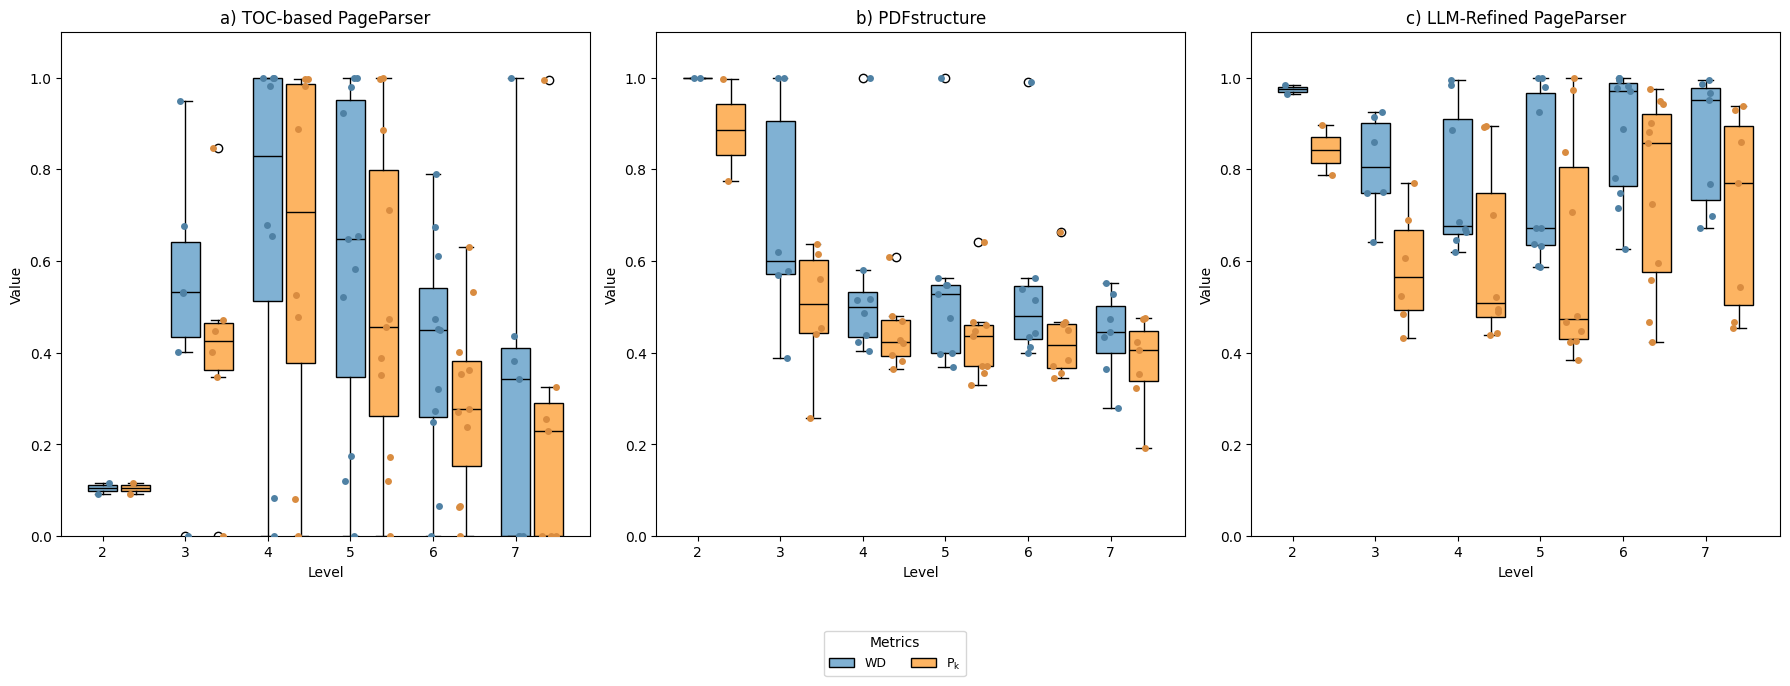

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

plt.rcParams.update({'mathtext.default': 'regular'})

# Define updated color scheme
colors = {
    "wd": "#80b1d3",       # Soft Blue
    "strip_wd": "#4f81a4", # Darker Blue (same family as wd)
    "p_k": "#fdb462",      # Warm Pastel Orange
    "strip_p_k": "#d98c40" # Darker Orange (same family as p_k)
}
edgecolor = 'black'

# Define grouped levels
levels = ['2', '3', '4', '5', '6', '7']


# Define toc based page parser dictionaries
wd_toc = {
    '2': wd2,
    '3': wd3,
    '4': wd4,
    '5': wd5,
    '6': wd6,
    '7': wd7
}

pks_toc = {
    '2': pks2,
    '3': pks3,
    '4': pks4,
    '5': pks5,
    '6': pks6,
    '7': pks7
}

# Define pdfstructure dictionaries
wd_pdf = {
    '2': wd_pdf2,
    '3': wd_pdf3,
    '4': wd_pdf4,
    '5': wd_pdf5,
    '6': wd_pdf6,
    '7': wd_pdf7
}

pks_pdf = {
    '2': pks_pdf2,
    '3': pks_pdf3,
    '4': pks_pdf4,
    '5': pks_pdf5,
    '6': pks_pdf6,
    '7': pks_pdf7
}


wd_llm={
    '2': wd_llm2,
    '3': wd_llm3,
    '4': wd_llm4,
    '5': wd_llm5,
    '6': wd_llm6,
    '7': wd_llm7
}

pks_llm={
    '2': pks_llm2,
    '3': pks_llm3,
    '4': pks_llm4,
    '5': pks_llm5,
    '6': pks_llm6,
    '7': pks_llm7
}




# Data for boxplots
wd_toc_data = [wd_toc[level] for level in levels]
pks_toc_data = [pks_toc[level] for level in levels]
wd_pdf_data = [wd_pdf[level] for level in levels]
pks_pdf_data = [pks_pdf[level] for level in levels]
llm_wd_data = [wd_llm[level] for level in levels]
llm_pks_data = [pks_llm[level] for level in levels]

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Function to plot boxplots and stripplots
def plot_box_strip(ax, wd_data, p_k_data, title):
    # Boxplots
    wd_boxes = ax.boxplot(wd_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True,
                          boxprops=dict(facecolor=colors["wd"], edgecolor=edgecolor), medianprops=dict(color='black'))
    
    p_k_boxes = ax.boxplot(p_k_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True,
                           boxprops=dict(facecolor=colors["p_k"], edgecolor=edgecolor), medianprops=dict(color='black'))

    # Stripplots
    sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in wd_data]),
                  y=[val for sublist in wd_data for val in sublist],
                  native_scale=True, color=colors["strip_wd"], ax=ax, jitter=True, size=5)

    sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in p_k_data]),
                  y=[val for sublist in p_k_data for val in sublist],
                  native_scale=True, color=colors["strip_p_k"], ax=ax, jitter=True, size=5)

    ax.set_ylim(0, 1.1)
    ax.set_xlabel('Level')
    ax.set_xticks(range(2, len(levels) + 2))
    ax.set_xticklabels(levels)
    ax.set_ylabel('Value')
    ax.set_title(title)

# Plot for TOC-based PageParser
plot_box_strip(ax1, wd_toc_data, pks_toc_data, 'a) TOC-based PageParser')

# Plot for PDFstructure
plot_box_strip(ax2, wd_pdf_data, pks_pdf_data, 'b) PDFstructure')

# Plot for LLM-Refined PageParser
plot_box_strip(ax3, llm_wd_data, llm_pks_data, 'c) LLM-Refined PageParser')

# Create unified legend
wd_patch = mpatches.Patch(facecolor=colors["wd"], edgecolor=edgecolor, label='WD')
p_k_patch = mpatches.Patch(facecolor=colors["p_k"], edgecolor=edgecolor, label='$P_{k}$')

# Adjust legend position
fig.legend(handles=[wd_patch, p_k_patch], title='Metrics', loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=9)

# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig("./llm_combined_wd_pk_results.pdf", format="pdf", bbox_inches="tight")
plt.show()
